In [1]:
import pandas as pd
import numpy as np
from haversine import haversine, Unit

In [2]:
from utils import read_dataset

# read dataset
# df_raw = pd.read_csv('./fraudTrain.csv', index_col=[0], parse_dates=['trans_date_trans_time', 'dob'])
df_raw = read_dataset(file = '../../data/fraudTrain.csv')
df_raw

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,city_state
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,1,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,"Moravian Falls, NC"
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,"Orient, WA"
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,0,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,"Malad City, ID"
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,0,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,"Boulder, MT"
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,0,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,"Doe Hill, VA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,0,162 Jessica Row Apt. 072,Hatch,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,"Hatch, UT"
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,0,8617 Holmes Terrace Suite 651,Tuscarora,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,"Tuscarora, MD"
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,0,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,"High Rolls Mountain Park, NM"
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,0,42933 Ryan Underpass,Manderson,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,"Manderson, SD"


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  object        
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  int64         
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  object        
 12  lat                    12966

In [4]:
from utils import drop_constant_column

df_raw = drop_constant_column(df_raw)

In [5]:
from utils import feature_eng

df_eng = feature_eng(df_raw)
df_eng

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_date,age,log_amt,age_bin,trans_month,trans_day,trans_wday,is_weekend,trans_hour,shop_net
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,1,561 Perry Cove,Moravian Falls,...,2019-01-01,30,1.786747,12-30,1,1,Tuesday,False,0,True
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1,43039 Riley Greens Suite 393,Orient,...,2019-01-01,40,4.684259,31-46,1,1,Tuesday,False,0,False
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,0,594 White Dale Suite 530,Malad City,...,2019-01-01,56,5.398660,47-62,1,1,Tuesday,False,0,False
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,0,9443 Cynthia Court Apt. 038,Boulder,...,2019-01-01,52,3.828641,47-62,1,1,Tuesday,False,0,False
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,0,408 Bradley Rest,Doe Hill,...,2019-01-01,32,3.760269,31-46,1,1,Tuesday,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,0,162 Jessica Row Apt. 072,Hatch,...,2020-06-21,57,2.806990,47-62,6,21,Sunday,True,12,False
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,0,8617 Holmes Terrace Suite 651,Tuscarora,...,2020-06-21,39,3.964615,31-46,6,21,Sunday,True,12,False
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,0,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,2020-06-21,51,4.672174,47-62,6,21,Sunday,True,12,False
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,0,42933 Ryan Underpass,Manderson,...,2020-06-21,38,4.329417,31-46,6,21,Sunday,True,12,False


In [6]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 33 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  object        
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  int64         
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  object        
 12  lat                    12966

In [7]:
# function to calculate distance from two geocoordinates (tuples)
def calc_distance(loc1_col, loc2_col):
    """Calculates the haversine distance between two geopoints 
    (tuples of latitude, longitude) in miles, rounded to 2 decimals.
    """
    return round((haversine(loc1_col, loc2_col, unit=Unit.MILES)), 2)

In [9]:
# retrieve geocode by city state
df_buyer_city_state = pd.read_csv('../../data/new_home_coords.csv')
df_buyer_city_state

,address,lat_home,long_home
0,"Medford, NY",40.817599,-73.000107
1,"Norfolk, VA",36.844835,-76.286400
2,"Oakton, VA",38.896729,-77.298697
3,"Moss Point, MS",30.411588,-88.534460
4,"Freeport, ME",43.857307,-70.103760
...,...,...,...
935,"Buellton, CA",34.613473,-120.193669
936,"Angwin, CA",38.578356,-122.448652
937,"Kirtland, NM",36.742460,-108.355309
938,"Seligman, MO",36.520800,-93.939065


In [10]:
df_buyer_city_state = df_buyer_city_state.rename(
        columns={
            "address": "city_state", 
            "lat_home":"buyer_city_state_lat", 
            "long_home":"buyer_city_state_long"
            }
        )

In [12]:
# create tuple for distance calc
df_buyer_city_state["buyer_city_state_location"] = df_buyer_city_state[
    ["buyer_city_state_lat", "buyer_city_state_long"]].apply(tuple, axis=1)

In [13]:
df_buyer_city_state

,city_state,buyer_city_state_lat,buyer_city_state_long,buyer_city_state_location
0,"Medford, NY",40.817599,-73.000107,"(40.8175985, -73.0001068)"
1,"Norfolk, VA",36.844835,-76.286400,"(36.8448348, -76.2863999)"
2,"Oakton, VA",38.896729,-77.298697,"(38.896729, -77.29869697995693)"
3,"Moss Point, MS",30.411588,-88.534460,"(30.4115881, -88.5344601)"
4,"Freeport, ME",43.857307,-70.103760,"(43.857307, -70.10376)"
...,...,...,...,...
935,"Buellton, CA",34.613473,-120.193669,"(34.6134727, -120.193669)"
936,"Angwin, CA",38.578356,-122.448652,"(38.5783555, -122.44865154545454)"
937,"Kirtland, NM",36.742460,-108.355309,"(36.7424605, -108.35530867398217)"
938,"Seligman, MO",36.520800,-93.939065,"(36.5208001, -93.9390651)"


In [15]:
# Merge in the city_state based location data
df_eng = pd.merge(left=df_eng, 
                  right=df_buyer_city_state, 
                  how="left", 
                  left_on="city_state", 
                  right_on="city_state")

In [18]:
# convert lat and long to tuple
df_eng["home_location"] = df_eng[["lat", "long"]].apply(tuple, axis=1)

In [20]:
# distance between buyer's city-state loc and home location
df_eng["distance_home_buyer_city_state"] = df_eng.apply(
    lambda x: calc_distance(
        x["home_location"], 
        x["buyer_city_state_location"]
    ), 
    axis=1
)

In [21]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 38 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   trans_date_trans_time           1296675 non-null  datetime64[ns]
 1   cc_num                          1296675 non-null  object        
 2   merchant                        1296675 non-null  object        
 3   category                        1296675 non-null  object        
 4   amt                             1296675 non-null  float64       
 5   first                           1296675 non-null  object        
 6   last                            1296675 non-null  object        
 7   gender                          1296675 non-null  int64         
 8   street                          1296675 non-null  object        
 9   city                            1296675 non-null  object        
 10  state                           1296675 no

<Axes: >

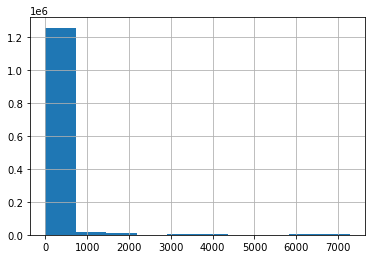

In [24]:
df_eng['distance_home_buyer_city_state'].hist()

In [25]:
df_eng.select_dtypes(include = 'object').nunique()

cc_num                           983
merchant                         693
category                          14
first                            352
last                             481
street                           983
city                             894
state                             51
zip                              970
job                              494
trans_num                    1296675
city_state                       928
trans_month                       12
trans_day                         31
trans_wday                         7
trans_hour                        24
buyer_city_state_location        927
home_location                    970
dtype: int64